# Working with the Python DASK library

Mat Larade -- mat.larade@ace-net.ca

## Notes about the slides ...

They are in a Jupyter notebook using the RISE extension.

https://github.com/MatACENET/Dask-Tutorial

RISE stands for Reveal.js - Jupyter/IPython Slideshow Extension

https://rise.readthedocs.io/en/maint-5.5/
    
Template shamelessly ripped from Chris Want christ.want@ualberta.ca

## Other resources

I won't be doing a comprehensive overview Dask, but
here is some supplimental material:
* Sharcnet webinar by Jinhui Qin
  * Great overview of Dask
  * https://youtube.sharcnet.ca
* U of A Workshop by Christ Want
  * https://ualberta-rcg.github.io/python-dask/
* Google for `dask tutorial`
  * Lots of good notebooks in a Github repository

## Python - General

* Python is an interperted software language that has a great deal of support in scientific and mathematical computing

* The major packages we will be referencing are Numpy, Pandas and of course Dask

## Python - Crash Course

* Variables are assigned using 

        variable_name = variable_content
        
     Variables may not start with a number
     
     May only contain underscores and alphanumeric characters
     
     Are case-sensitive
     


* Lists are created in python using 

        list_name = [var_1, var_2, ... var_n]



* Functions are created using 

        def function_name(arg_1, arg_2, ... arg_n):
            code_goes_here

* Functions are called using 
    
        function_name(arg_1, arg_2, ... arg_n)
        
* For loops are created using

        for object in iterator:
            code_goes_here
            
* Loop and function scope is indicated by indentation depth
* Colons are used to indicate a for loop or function has been defined.

In [1]:
for i in range(0,5):
    print(i*2)

0
2
4
6
8


* Functions and libraries are imported using

        (1) import package_name**

        (2) from package_name import sub_package

* How functions from libraries are used:

       (1) package_name.sub_package(args)
       
       (2) sub_package(args)

## Jupyter Notebooks - Usage

* Jupyter notebooks, for those of you unfamiliar with python are kind of similar to debugging with VSCode, where you step through code in units at a time.
* To execute code in a cell, press **[Shift + Enter]**.
* Each unit is a cell, and all of the code is executed sequentially inside of the cell.
* State is preserved between cells and cells can be run out of order or run multiple times.

In [2]:
i = 0

In [5]:
i += 1

In [6]:
#This cell will change value depending on how the above cells are run.
print(i)

3


## Jupyter Notebooks - Warnings

* I cannot reccomend using Jupyter notebooks outside of teaching because of the issues above, and they are slow to execute, heavyweight, and lack many of the features found inside of most IDE's, such as linting and convenient copying and pasting
* If you want to learn or write python, I reccomend using:
* **Visual Studio Code** - Full fat IDE with a built in python debugger, can easily be connected to anaconda or other sources of python - My preferred solution to Python on Linux and Windows - https://code.visualstudio.com/
* **Sublime Text** - Text editor with many plugins to help with linting, code highlighting, etc - Useful for when a full IDE is overkill, such as disposable scripts. - https://www.sublimetext.com/
* **Vim** - Doesn't really need an introduction, but is very useful when editing code on the command line and has a fairly rich feature set if you spend the time with it. Highly reccomended for interacting with code on the command line, such as our HPC clusters. - Literally every command line interface seems to come bundled with Vim

## Setting up Python

* To do python on the clusters, we use a virtual environment.
* To create and load into a virtual environment, enter these commands in your terminal

* To deactivate the environment enter in "deactivate", and you should be back to the normal bash terminal.
* Now that the environment exists, we can install some python packages using python's package manager, pip [Pip Installs Python]
* There are several ways to do this, but the packages that we require are: Scikit-Learn, DASK, Graphviz, Numpy, Pandas and MatPlotLib
* Scipy stack takes care of most of that for us, installing Numpy Pandas, and MatPlotLib. (thanks, sysadmins!)

First way, on your command line and inside of the virtual environment:

Second way:

where requirements.txt contains:

## DASK - General

Dask is a lazy framework that automates parallel operations. Lazy, meaning that it doesn’t operate until it is told to.

Dask is conceptually similar to a dishwasher\*, where it will wait idle until it’s told to do everything all at once**.

*Using Dask does not guarantee your code will be clean.

**Not everything actually done all at once, Dask does several things at once.

## An artist's rendition of DASK before running based on my description
<left>![](./Pictures/Picture1.png)</left>

## Dask - Distributed

Dask can operate as it’s own task manager in one of three ways:
1. Threaded – Using small, independent chunks of code running in the same instance of a computer program. Best for operations on numerical data that doesn’t keep a Global Interpreter Lock* (e.g. Numpy, Pandas, Scikit-Learn).
2. Processes – Sends data to separate instances of a program to be processed.  Generally works best when there are several instances of a program running at simultaneously that hold the Global Interpreter Lock*.
3. Single-Threaded – Does one chunk of code at a time, with no parallel capacity. Primarily for Debugging.

Parallel programming with Python has a complicated history because of a design decision, the Global Interpreter Lock, which limits python to a single thread most of the time. Global interperter lock is a complicated subject that I'm not prepared to digress into. If you really want to know about the GIL, https://realpython.com/python-gil/ , https://en.wikipedia.org/wiki/Global_interpreter_lock

TL,DR:  Numpy, Pandas, and Scikit-Learn work around the problem using threads and Dask can work with that.

* Where I am running locally, I begin by spawning a client.  There are several different ways of doing this, however, we will be using a 4-core, 1 worker cluster, with a memory limit of 2GB of memory (adjust the memory req for whatever you can spare if you need to).
* This client will open up a "Dashboard" which you can use to monitor what's going on under the hood of your DASK instance.
* If you'd like to read more about specific clients, and how they operate, please refer to https://distributed.dask.org/en/latest/ as these features are difficult to use effectively on HPC systems
* We will not be delving deep into the distributed modules in Dask, as they are both very complex and do not work well with our HPC infrastructure, however, it is a powerful set of tools inside of the Dask kit, especially when operating on your local workstations.

In [7]:
# This is for me to create diagnostic reports, and your own if you review these notbooks 
# You do not need to include this in any of your scripts
from dask.distributed import Client, progress
client = Client(processes=False, threads_per_worker=4,
                n_workers=1, memory_limit='2GB')
client

Client Scheduler: inproc://192.168.0.5/9096/1 Dashboard: http://192.168.0.5:8787/status,Cluster Workers: 1 Cores: 4 Memory: 2.00 GB


## Dask - Delayed

* The Delayed command holds back the operations and assigns them to different cores.
* Rather than waiting for tasks to finish sequentially, initial tasks are assigned to different cores that operate simultaneously. 
* When a core finishes it’s job, it gets a new operation, similar to customs in an Airport.

## Dask - Delayed

We are going to demonstrate how dask.delayed works using an increment function that takes one second to execute, and and add function that takes one second to execute.

In [8]:
from time import sleep
from dask import delayed

def increment(x):
    sleep(1)
    return x + 1

def add(x, y):   
    sleep(1)
    return x +  y

In [2]:
%%time
# This takes three seconds to run because we call each
# function sequentially, one after the other

x = increment(1)
y = increment(2)
z = add(x, y)

Wall time: 3 s


In [3]:
%%time
# This runs immediately, all it does is build a graph

x = delayed(increment)(1)
y = delayed(increment)(2)
z = delayed(add)(x, y)

Wall time: 7 ms


In [4]:
%%time
# This actually runs our computation using a local process pool

z.compute()

Wall time: 2.14 s


5

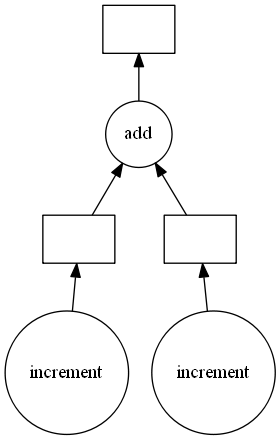

In [5]:
z.visualize()

## Dask - Delayed Excercise

Use Dask.Delayed to improve the execution speed of this for loop

In [ ]:
%%time
output = []

for i in range(100):
    j = increment(i)
    output.append(j)

total = sum(output)
    
print(total)

In [11]:
%%time
#answer 1
output = []
for i in range(100):
    j = delayed(increment)(i)
    output.append(j)

total = sum(output)

total.compute()

Wall time: 3.02 s


55

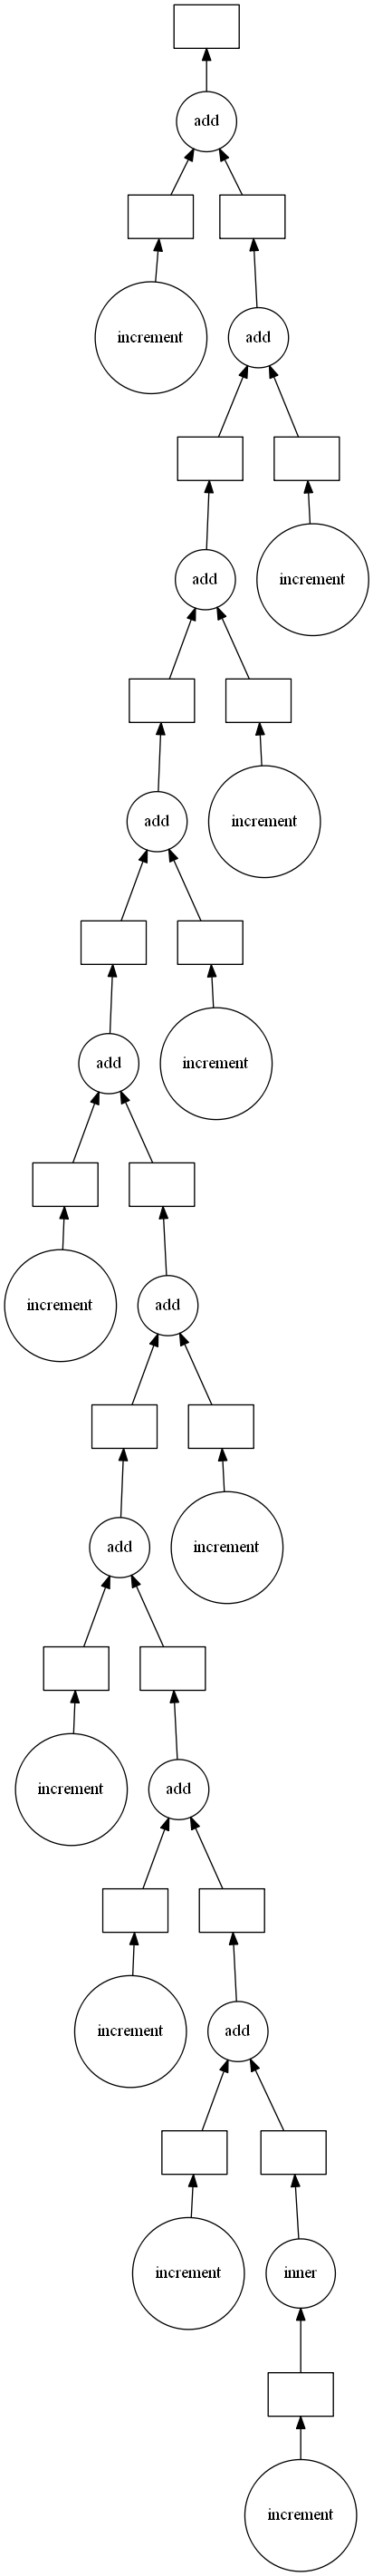

In [12]:
total.visualize()

In [13]:
%%time
#answer 2
output = []

for i in range(100):
    j = delayed(increment)(i)
    output.append(j)
    
total = delayed(sum)(output)
    
total.compute()

Wall time: 3.04 s


55

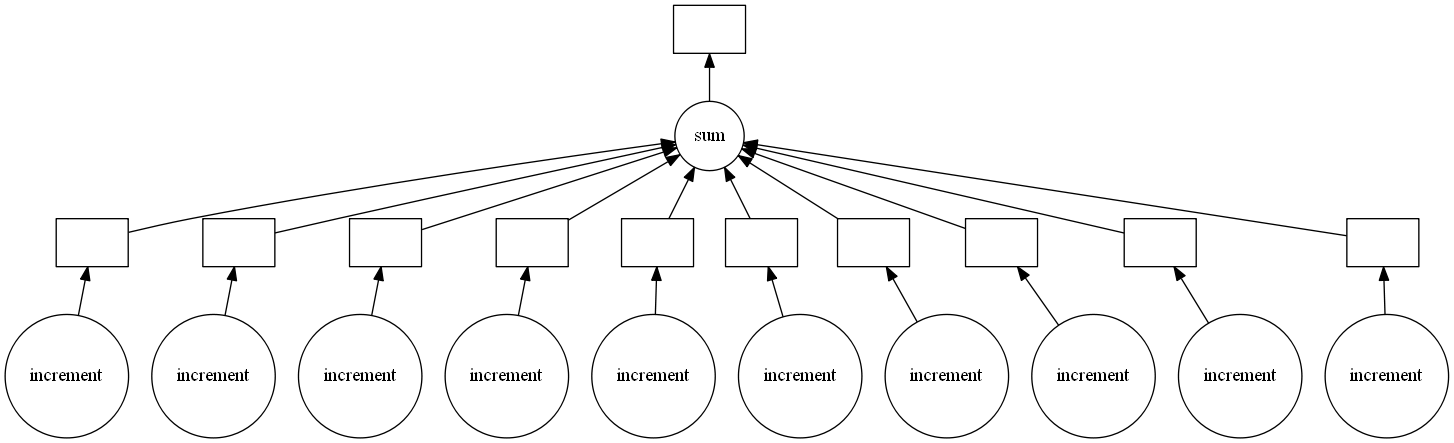

In [14]:
total.visualize()

Note: When benchmarked with 1,000 and 10,000 samples of data, the runtimes diverege as follows:

    Serial:       1,000: 16:40       10,000: 2:47:40
    
    Answer1:      1,000:  4:12       10,000: 0:42:27
    
    Answer2:      1,000:  4:11       10,000: 0:42:25

## Dask - Bagging

* Bagging works by taking semi-structured data and preparing that data to be operated on in parallel.
* Bags work on what they have to at any given time, so once a data chunk is processed, it is removed from memory, thus reducing the overall footprint of operations.

## Portions up your data so you can...
![](./Pictures/Picture4.jpg)

## You can run more data through faster than single threads
 
![](./Pictures/Picture3.jpg)
*in the metaphor, each core is it's own pizza oven

In [16]:
from dask import bag
bag1 = bag.from_sequence([1, 2, 3, 4, 5, 6, 7, 8, 9, 10], npartitions=2)
bag1.take(3)

(1, 2, 3)

`Bag` objects hold the standard functional API found in projects like the Python standard library, `toolz`, or `pyspark`, including `map`, `filter`, `groupby`, etc..

Operations on `Bag` objects create new bags.  Call the `.compute()` method to trigger execution, as we saw for `Delayed` objects.  

In [17]:
def is_even(n):
    return n % 2 == 0

In [18]:
small_list = []
for i in range(0,10):
    small_list.append(i)
bag_small = bag.from_sequence(small_list)

In [22]:
%%time
new_list_small = []
for item in small_list:
    if is_even(item):
        new_list_small.append(item**2)
print(new_list_small)

[0, 4, 16, 36, 64]
Wall time: 0 ns


In [23]:
%%time
filtered_bag_small = bag_small.filter(is_even).map(lambda x: x ** 2)
filtered_bag_small.compute()

Wall time: 51 ms


[0, 4, 16, 36, 64]

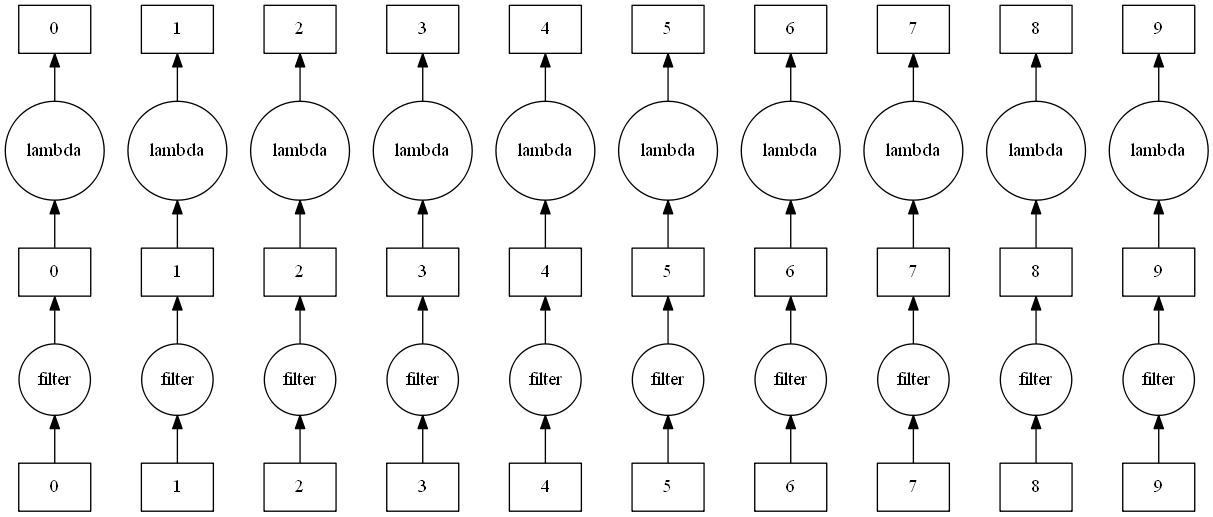

In [25]:
filtered_bag_small.visualize()

In [26]:
big_list = []
for i in range(0,10000):
    big_list.append(i)
bag_big = bag.from_sequence(big_list)

In [29]:
%%time
new_list_big = []
for item in big_list:
    if is_even(item):
        new_list_big.append(item**2)

Wall time: 5 ms


In [30]:
%%time
filtered_bag_big = bag_big.filter(is_even).map(lambda x: x ** 2)
filtered_bag_big.compute()
print("This statement is to stop the Jupyter from dumping the entire output out")

This statement is to stop the Jupyter from dumping the entire output out
Wall time: 683 ms


Note that when the size of the list increases, bagging becomes a more efficent way of processing data.

## Numpy

![](./Pictures/Math.jpg)

* Numpy is a widely used and comprehensive mathematics package in python
* Numpy stands for "Numerical Python", and handles tasks such as matrix math, trig, linear algebra, etc.
* Is very useful for matrix math, and matrix-like operations, such as loading data into machine learning algorithms
* This talk will not deep-dive into numpy, but will instead talk about a few key features, give a rough idea of what numpy is capable of, before moving on to dask arrays

In [3]:
import numpy as np

## Numpy

* Numpy primarily works on arrays of data, though several functions can be called on intigers or floats.
* Arrays may have between 1 and n dimensions, and are primarily limited in size by the amount of ram a computer has to operarte on them.
* We will walk through a quick example on how to create a numpy arrray, then pass it over to DASK.

In [8]:
array = np.arange(16)
print(array)

[ 0  1  2  3  4  5  6  7  8  9 10 11 12 13 14 15]


In [10]:
array2 = array.reshape(4,4)
print(array2)

[[ 0  1  2  3]
 [ 4  5  6  7]
 [ 8  9 10 11]
 [12 13 14 15]]


In [11]:
print(array.shape)
print(array2.shape)

(16,)
(4, 4)


## Numpy 
* Numpy has most of the mathematical functions that one could ask for, a non-exhaustive list includes


* Numpy backs onto well-written, compiled software, so it performs faster and more reliable calculations than most code you can write yourself

## Dask - Arrays

* Dask arrays are a multidimensional, structured data format that are useful for manipulating large amounts of numerical data. 
* Dask arrays are distributed Numpy arrays.
* Dask arrays can be manipulated in parallel.
* Much of the syntax for Dask arrays is lifted directly from numpy

In [35]:
from dask import array as da

dask_array = da.from_array(array2) 

In [38]:
#import a small dataset from SKLearn for later
from sklearn import datasets
iris_data = datasets.load_iris()
iris_attributes = iris_data.data
iris_classes = iris_data.target

In [36]:
iris_attributes_dask = da.from_array(iris_attributes)

NameError: name 'iris_attributes' is not defined

In [37]:
da.mean(iris_attributes_dask)

NameError: name 'iris_attributes_dask' is not defined

In [25]:
%%time
np.mean(iris_attributes)

NameError: name 'iris_attributes' is not defined

In [26]:
x = da.random.random((10000, 10000), chunks=(1000, 1000))
z = da.mean(x)

In [32]:
%%time
z.compute()

Wall time: 116 ms


0.5000484232194616

You can also force DASK arrays to hold the data in memory as well, using the persist command

In [30]:
x_persist = x.persist()
z_persist = da.mean(x_persist)

In [34]:
%%time
#Old time was ~116ms
z_persist.compute()

Wall time: 107 ms


0.5000484232194616

## Dask - Arrays: Limitations

* Not all of numpy is included in dask, specifically sorting, listing, and some smaller functions
* Dask tends to be slightly slower than loading the entire dataset into memory

## Dask arrays allows you to move mountians
![](./Pictures/Picture6.jpg)

## A bucket of rocks at a time
![](./Pictures/Picture5.jpg)

## Python - Pandas

![](./Pictures/Panda.jpg)

* Pandas is effectively a spreadsheeting program for python, running on Python/Cython/C.
* Pandas is similar to Excel, but does not have a GUI, so it is faster, but less user friendly.
* Pandas tends to operate more quickly and efficiently than full-fat Microsoft Excel.
* Pandas operates primarily using DataFrames, rougly equivalent to Excel Sheets.

In [47]:
#The data is the google search trends for the word "parallel"
import pandas as pd

pandas_dataframe = pd.read_csv('Data/multiTimeline.csv')
print(pandas_dataframe.head())

             Category: All categories
Week        parallel: (United States)
2019-06-02                         25
2019-06-09                         23
2019-06-16                         22
2019-06-23                         21


Pandas offers much of the same functionality as Excel, except you need to print out data as you go.

In [9]:
print(pandas_dataframe.columns.values)
print(pandas_dataframe.index.values)

['Category: All categories']
['Week' '2019-06-02' '2019-06-09' '2019-06-16' '2019-06-23' '2019-06-30'
 '2019-07-07' '2019-07-14' '2019-07-21' '2019-07-28' '2019-08-04'
 '2019-08-11' '2019-08-18' '2019-08-25' '2019-09-01' '2019-09-08'
 '2019-09-15' '2019-09-22' '2019-09-29' '2019-10-06' '2019-10-13'
 '2019-10-20' '2019-10-27' '2019-11-03' '2019-11-10' '2019-11-17'
 '2019-11-24' '2019-12-01' '2019-12-08' '2019-12-15' '2019-12-22'
 '2019-12-29' '2020-01-05' '2020-01-12' '2020-01-19' '2020-01-26'
 '2020-02-02' '2020-02-09' '2020-02-16' '2020-02-23' '2020-03-01'
 '2020-03-08' '2020-03-15' '2020-03-22' '2020-03-29' '2020-04-05'
 '2020-04-12' '2020-04-19' '2020-04-26' '2020-05-03' '2020-05-10'
 '2020-05-17' '2020-05-24']


You can print out data from a specific locus or from a pair of headings

In [22]:
i=5
j=0
print(pandas_dataframe.iloc[i, j])
print(pandas_dataframe.loc['2019-07-07', 'Category: All categories'])

18
20


You can get a dump of the information about a dataframe, such as what it contains and the datatypes stored inside of it.

In [23]:
print(pandas_dataframe.info())

<class 'pandas.core.frame.DataFrame'>
Index: 53 entries, Week to 2020-05-24
Data columns (total 1 columns):
Category: All categories    53 non-null object
dtypes: object(1)
memory usage: 3.3+ KB
None


You can also have pandas crunch some bulk statistics on your data.

In [24]:
pandas_dataframe.describe()

,Category: All categories
count,53
unique,25
top,35
freq,6


You can also perform excel functions/operations on data such as plotting.

In [25]:
%matplotlib inline
import matplotlib.pyplot as plt

In [44]:
print(pandas_dataframe.iloc[1:,0])
print(type(pandas_dataframe.iloc[1,0]))

2019-06-02     25
2019-06-09     23
2019-06-16     22
2019-06-23     21
2019-06-30     18
2019-07-07     20
2019-07-14     21
2019-07-21     21
2019-07-28     19
2019-08-04     19
2019-08-11     21
2019-08-18     24
2019-08-25     26
2019-09-01     27
2019-09-08     32
2019-09-15     34
2019-09-22     34
2019-09-29     36
2019-10-06     35
2019-10-13     33
2019-10-20     35
2019-10-27     35
2019-11-03     33
2019-11-10     32
2019-11-17     32
2019-11-24     21
2019-12-01     31
2019-12-08     32
2019-12-15     29
2019-12-22     13
2019-12-29     15
2020-01-05     26
2020-01-12     28
2020-01-19     29
2020-01-26     31
2020-02-02     34
2020-02-09     34
2020-02-16     34
2020-02-23     36
2020-03-01     35
2020-03-08     31
2020-03-15     24
2020-03-22     29
2020-03-29     35
2020-04-05     33
2020-04-12     34
2020-04-19     38
2020-04-26     38
2020-05-03     37
2020-05-10     35
2020-05-17    100
2020-05-24     44
Name: Category: All categories, dtype: object
<class 'str'>


In [45]:
pandas_dataframe.iloc[1:,0] = pandas_dataframe.iloc[1:,0].astype(int)
print(type(pandas_dataframe.iloc[1,0]))

<class 'int'>


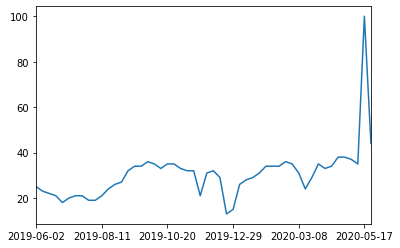

In [46]:
pandas_dataframe.iloc[1:,0].plot()

## Dask - When to use DataFrames (from the Dask documentation)

Dask DataFrames are used in situations where Pandas is commonly needed, but when Pandas is inadequare due to:

* Manipulating large datasets, especially when those datasets don’t fit in memory
* Accelerating long computations by using many cores
* Distributed computing on large datasets with standard Pandas operations like groupby, join, and time series computations

In [48]:
import dask.dataframe as dd

In [49]:
dask_dataframe = dd.read_csv('Data/multiTimeline.csv')

## Dask DataFrames Anti-Uses

Dask DataFrame may not be the best choice in the following situations:

* If your dataset fits into RAM on your laptop, just using Pandas. There are probably simpler ways to improve performance than  parallelism.
* If your dataset doesn’t fit neatly into the Pandas tabular model, then you might find more use in dask.bag or dask.array.
* If you need functions that are not implemented in Dask DataFrame, then you might want to look at dask.delayed which offers more flexibility.
* If you need all of the features that databases offer you should consider PostgresSQL or MySQL.